# Supervised Machine Learning: Classification - Final Project 

The final project for Classification involves analyzing a data set to predict type of forest cover using features.

In [2]:
!pip install imbalanced-learn==0.8.0

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance, plot_partial_dependence

In [4]:
df = pd.read_csv('covtype.csv')

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [6]:
typelist = df.dtypes

In [7]:
typelist.value_counts()

int64    55
dtype: int64

In [9]:
val_list = df.describe().T

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [15]:
missing_vals = df.isna()

In [20]:
missing_vals.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
missing_vals.sum().sum()

0

In [9]:
df.shape

(581012, 55)

In [10]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [11]:
df['Cover_Type'].value_counts(normalize=True)

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64

The dataset has 7 different classes in the target column. It is clear from the distribution of the values that the dataset suffers from highly imbalanced classes. Classes labelled 2 and 1 comprise about 85% of the total values in the dataset. Classes 3, 7 and 6 comprise only about 12.5 % of the dataset while classes 5 and 4  make up about 2% of the values only.

<AxesSubplot:>

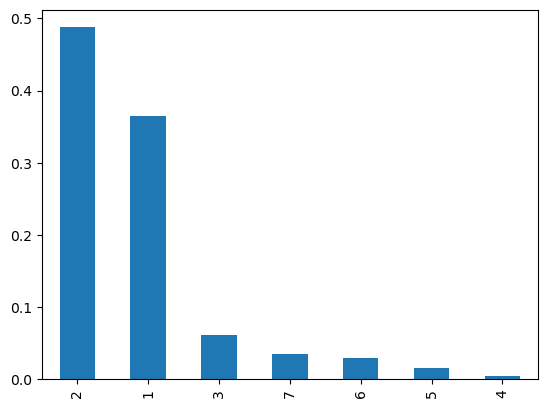

In [12]:
df['Cover_Type'].value_counts(normalize=True).plot(kind='bar')

In [14]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


For this approach to work, we turn index column into a unique identifier column for each row.

In [5]:
df.reset_index(inplace=True)

In [18]:
df.tail()

,index,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,581007,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,3
581008,581008,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,3
581009,581009,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,3
581010,581010,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,3
581011,581011,2383,165,13,60,4,67,231,244,141,...,0,0,0,0,0,0,0,0,0,3


In [6]:
X = df.iloc[:,:-1]

In [32]:
X.head()

,index,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,1,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,2,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,3,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,4,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = df.iloc[:, -1:]

In [34]:
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [35]:
y.value_counts(normalize=True)

Cover_Type
2             0.487599
1             0.364605
3             0.061537
7             0.035300
6             0.029891
5             0.016339
4             0.004728
dtype: float64

The dataset is quite large so downsampling might be an option.

In [8]:
under_sampler = RandomUnderSampler(random_state=123)

In [9]:
X_train, y_train = under_sampler.fit_resample(X, y)

In [38]:
X_train.shape

(19229, 55)

In [39]:
y_train.shape

(19229, 1)

In [40]:
y_train.value_counts(normalize=True)

Cover_Type
1             0.142857
2             0.142857
3             0.142857
4             0.142857
5             0.142857
6             0.142857
7             0.142857
dtype: float64

In [41]:
X_train.head()

,index,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,449586,3109,160,11,258,40,1384,231,242,141,...,0,0,1,0,0,0,0,0,0,0
1,287825,3157,275,27,85,11,1084,139,235,229,...,0,0,0,0,0,0,0,0,0,0
2,347980,3086,93,16,30,-2,2584,243,214,96,...,1,0,0,0,0,0,0,0,0,0
3,174387,3181,261,25,212,42,4656,149,243,227,...,0,0,0,0,0,0,0,0,0,0
4,84741,3054,103,4,690,50,5810,227,234,141,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test = df[~df.isin(X_train)].dropna()

In [11]:
X_test.head()

,index,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
19229,19229,2676.0,359.0,20.0,30.0,13.0,1736.0,187.0,200.0,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
19230,19230,2673.0,6.0,20.0,42.0,10.0,1708.0,191.0,197.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
19231,19231,2673.0,10.0,18.0,60.0,15.0,1679.0,198.0,201.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
19232,19232,2669.0,6.0,15.0,67.0,16.0,1651.0,200.0,209.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
19233,19233,2671.0,4.0,15.0,85.0,16.0,1622.0,200.0,211.0,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [12]:
y_test = X_test.iloc[:,-1:]

In [14]:
y_test.shape

(561783, 1)

In [15]:
X_test = X_test.iloc[:,:-1]

In [16]:
X_test.shape

(561783, 55)

With the train and test sets created, the index column serves no further purpose and is therefore dropped.

In [17]:
X_train = X_train.iloc[:,1:]

In [18]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,3109,160,11,258,40,1384,231,242,141,3420,...,0,0,1,0,0,0,0,0,0,0
1,3157,275,27,85,11,1084,139,235,229,2522,...,0,0,0,0,0,0,0,0,0,0
2,3086,93,16,30,-2,2584,243,214,96,1889,...,1,0,0,0,0,0,0,0,0,0
3,3181,261,25,212,42,4656,149,243,227,3382,...,0,0,0,0,0,0,0,0,0,0
4,3054,103,4,690,50,5810,227,234,141,3891,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_test = X_test.iloc[:,1:]

In [20]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
19229,2676.0,359.0,20.0,30.0,13.0,1736.0,187.0,200.0,147.0,6423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19230,2673.0,6.0,20.0,42.0,10.0,1708.0,191.0,197.0,139.0,6405.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19231,2673.0,10.0,18.0,60.0,15.0,1679.0,198.0,201.0,137.0,6386.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19232,2669.0,6.0,15.0,67.0,16.0,1651.0,200.0,209.0,144.0,6367.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19233,2671.0,4.0,15.0,85.0,16.0,1622.0,200.0,211.0,147.0,6349.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
X_train.shape[0] + X_test.shape[0]

581012

In [59]:
df.shape[0]

581012

In [118]:
(X_train.shape[0] / df.shape[0])*100

3.309570198205889

In [21]:
scaler = StandardScaler()

In [22]:
X_train_s = scaler.fit_transform(X_train)

In [23]:
X_test_s = scaler.transform(X_test)

In [50]:
lr = LogisticRegressionCV(Cs=1, max_iter=1000, penalty='l2', solver='saga')

In [51]:
lr.fit(X_train_s, y_train.values.ravel())

LogisticRegressionCV(Cs=1, max_iter=1000, solver='saga')

In [52]:
lr_train_pred = lr.predict(X_train_s)

In [53]:
print(classification_report(y_train, lr_train_pred))

              precision    recall  f1-score   support

           1       0.57      0.51      0.54      2747
           2       0.49      0.53      0.51      2747
           3       0.55      0.42      0.47      2747
           4       0.70      0.83      0.76      2747
           5       0.61      0.61      0.61      2747
           6       0.54      0.61      0.58      2747
           7       0.86      0.83      0.84      2747

    accuracy                           0.62     19229
   macro avg       0.62      0.62      0.61     19229
weighted avg       0.62      0.62      0.61     19229



In [54]:
lr_test_pred = lr.predict(X_test_s)

In [55]:
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

           1       0.64      0.51      0.56    209054
           2       0.69      0.51      0.59    277890
           3       0.63      0.42      0.50     33594
           4       0.04      0.81      0.08       587
           5       0.05      0.60      0.10      7101
           6       0.25      0.60      0.36     15207
           7       0.36      0.81      0.50     18350

    accuracy                           0.52    561783
   macro avg       0.38      0.61      0.38    561783
weighted avg       0.64      0.52      0.56    561783



In [56]:
dt = DecisionTreeClassifier(random_state=4)

In [57]:
dt.fit(X_train_s, y_train)

DecisionTreeClassifier(random_state=4)

In [58]:
dt_train_pred = dt.predict(X_train_s)

In [59]:
print(classification_report(y_train, dt_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      1.00      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [60]:
dt_test_pred = dt.predict(X_test_s)

In [61]:
print(classification_report(y_test, dt_test_pred))

              precision    recall  f1-score   support

           1       0.70      0.70      0.70    209054
           2       0.79      0.65      0.71    277890
           3       0.77      0.80      0.78     33594
           4       0.26      1.00      0.41       587
           5       0.21      0.93      0.35      7101
           6       0.50      0.84      0.62     15207
           7       0.52      0.95      0.67     18350

    accuracy                           0.69    561783
   macro avg       0.53      0.84      0.61    561783
weighted avg       0.73      0.69      0.70    561783



In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

In [63]:
knn.fit(X_train_s, y_train.values.ravel())

KNeighborsClassifier()

In [64]:
knn_train_pred = knn.predict(X_train_s)

In [65]:
print(classification_report(y_train, knn_train_pred))

              precision    recall  f1-score   support

           1       0.82      0.81      0.82      2747
           2       0.83      0.71      0.77      2747
           3       0.87      0.82      0.84      2747
           4       0.91      0.98      0.94      2747
           5       0.88      0.97      0.92      2747
           6       0.86      0.88      0.87      2747
           7       0.94      0.97      0.96      2747

    accuracy                           0.88     19229
   macro avg       0.87      0.88      0.87     19229
weighted avg       0.87      0.88      0.87     19229



In [66]:
knn_test_pred = knn.predict(X_test_s)

In [67]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71    209054
           2       0.82      0.59      0.69    277890
           3       0.72      0.72      0.72     33594
           4       0.13      0.99      0.22       587
           5       0.13      0.95      0.23      7101
           6       0.42      0.81      0.55     15207
           7       0.50      0.95      0.65     18350

    accuracy                           0.66    561783
   macro avg       0.49      0.82      0.54    561783
weighted avg       0.74      0.66      0.69    561783



In [68]:
svm = SVC(kernel='rbf')

In [69]:
svm.fit(X_train_s, y_train.values.ravel())

SVC()

In [70]:
svm_train_pred = svm.predict(X_train_s)

In [71]:
print(classification_report(y_train, svm_train_pred))

              precision    recall  f1-score   support

           1       0.70      0.73      0.71      2747
           2       0.67      0.58      0.62      2747
           3       0.71      0.62      0.66      2747
           4       0.81      0.95      0.88      2747
           5       0.79      0.84      0.81      2747
           6       0.69      0.69      0.69      2747
           7       0.91      0.89      0.90      2747

    accuracy                           0.76     19229
   macro avg       0.75      0.76      0.75     19229
weighted avg       0.75      0.76      0.75     19229



In [72]:
svm_test_pred = svm.predict(X_test_s)

In [73]:
print(classification_report(y_test, svm_test_pred))

              precision    recall  f1-score   support

           1       0.70      0.71      0.71    209054
           2       0.82      0.56      0.66    277890
           3       0.67      0.61      0.64     33594
           4       0.08      0.94      0.15       587
           5       0.10      0.84      0.18      7101
           6       0.35      0.67      0.46     15207
           7       0.48      0.88      0.62     18350

    accuracy                           0.64    561783
   macro avg       0.46      0.75      0.49    561783
weighted avg       0.73      0.64      0.67    561783



In [74]:
test_scores_micro = {}
test_scores_micro['Logistic Regression'] = f1_score(y_test, lr_test_pred, average='micro')
test_scores_micro['Decision Tree'] = f1_score(y_test, dt_test_pred, average='micro')
test_scores_micro['K-Neighbors'] = f1_score(y_test, knn_test_pred, average='micro')
test_scores_micro['Support Vector Machine'] = f1_score(y_test, svm_test_pred, average='micro')

In [75]:
test_scores_micro

{'Logistic Regression': 0.5182463691496538,
 'Decision Tree': 0.6934207692294,
 'K-Neighbors': 0.6639289547743523,
 'Support Vector Machine': 0.6379545126855031}

In [76]:
test_scores_macro = {}
test_scores_macro['Logistic Regression'] = f1_score(y_test, lr_test_pred, average='macro')
test_scores_macro['Decision Tree'] = f1_score(y_test, dt_test_pred, average='macro')
test_scores_macro['K-Neighbors'] = f1_score(y_test, knn_test_pred, average='macro')
test_scores_macro['Support Vector Machine'] = f1_score(y_test, svm_test_pred, average='macro')

In [77]:
test_scores_macro

{'Logistic Regression': 0.38405704357316417,
 'Decision Tree': 0.6052971149488412,
 'K-Neighbors': 0.5392049526780915,
 'Support Vector Machine': 0.48936474936616303}

In [78]:
test_scores_weight = {}
test_scores_weight['Logistic Regression'] = f1_score(y_test, lr_test_pred, average='weighted')
test_scores_weight['Decision Tree'] = f1_score(y_test, dt_test_pred, average='weighted')
test_scores_weight['K-Neighbors'] = f1_score(y_test, knn_test_pred, average='weighted')
test_scores_weight['Support Vector Machine'] = f1_score(y_test, svm_test_pred, average='weighted')

In [79]:
test_scores_weight

{'Logistic Regression': 0.55861369804408,
 'Decision Tree': 0.7030739660771586,
 'K-Neighbors': 0.6853360699882248,
 'Support Vector Machine': 0.6652711024413865}

In [80]:
train_scores_micro = {}
train_scores_micro['Logistic Regression'] = f1_score(y_train, lr_train_pred, average='micro')
train_scores_micro['Decision Tree'] = f1_score(y_train, dt_train_pred, average='micro')
train_scores_micro['K-Neighbors'] = f1_score(y_train, knn_train_pred, average='micro')
train_scores_micro['Support Vector Machine'] = f1_score(y_train, svm_train_pred, average='micro')

In [81]:
train_scores_micro

{'Logistic Regression': 0.6173487960892402,
 'Decision Tree': 1.0,
 'K-Neighbors': 0.8758645795413178,
 'Support Vector Machine': 0.7571896614488532}

In [82]:
train_scores_macro = {}
train_scores_macro['Logistic Regression'] = f1_score(y_train, lr_train_pred, average='macro')
train_scores_macro['Decision Tree'] = f1_score(y_train, dt_train_pred, average='macro')
train_scores_macro['K-Neighbors'] = f1_score(y_train, knn_train_pred, average='macro')
train_scores_macro['Support Vector Machine'] = f1_score(y_train, svm_train_pred, average='macro')

In [83]:
train_scores_macro

{'Logistic Regression': 0.6140053285627873,
 'Decision Tree': 1.0,
 'K-Neighbors': 0.8737737077154427,
 'Support Vector Machine': 0.7537341148079817}

In [84]:
train_scores_weight = {}
train_scores_weight['Logistic Regression'] = f1_score(y_train, lr_train_pred, average='weighted')
train_scores_weight['Decision Tree'] = f1_score(y_train, dt_train_pred, average='weighted')
train_scores_weight['K-Neighbors'] = f1_score(y_train, knn_train_pred, average='weighted')
train_scores_weight['Support Vector Machine'] = f1_score(y_train, svm_train_pred, average='weighted')

In [85]:
scores=[test_scores_micro, test_scores_macro, test_scores_weight,train_scores_micro, train_scores_macro, train_scores_weight]

In [86]:
index=['Micro_test','Macro_test','Weighted_test','Micro_train','Macro_train','Weighted_train']

In [87]:
scores_df = pd.DataFrame(scores, index=index)

In [88]:
scores_df

,Logistic Regression,Decision Tree,K-Neighbors,Support Vector Machine
Micro_test,0.518246,0.693421,0.663929,0.637955
Macro_test,0.384057,0.605297,0.539205,0.489365
Weighted_test,0.558614,0.703074,0.685336,0.665271
Micro_train,0.617349,1.000000,0.875865,0.757190
Macro_train,0.614005,1.000000,0.873774,0.753734
Weighted_train,0.614005,1.000000,0.873774,0.753734


Note that decision tree is over fitting to the training data. We can deal with this by using Bagging.

In [56]:
bag = BaggingClassifier(base_estimator=dt, random_state=0, bootstrap=True)

In [57]:
bag.fit(X_train_s, y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=4),
                  random_state=0)

In [153]:
bag_train_pred = bag.predict(X_train_s)

In [154]:
print(classification_report(y_train, bag_train_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      2747
           2       1.00      0.98      0.99      2747
           3       0.99      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      0.99      0.99      2747
           7       1.00      1.00      1.00      2747

    accuracy                           0.99     19229
   macro avg       0.99      0.99      0.99     19229
weighted avg       0.99      0.99      0.99     19229



In [155]:
bag_test_pred = bag.predict(X_test_s)

In [156]:
print(classification_report(y_test, bag_test_pred))

              precision    recall  f1-score   support

           1       0.74      0.79      0.76    209054
           2       0.86      0.67      0.75    277890
           3       0.80      0.86      0.83     33594
           4       0.30      1.00      0.46       587
           5       0.25      0.96      0.40      7101
           6       0.56      0.88      0.68     15207
           7       0.61      0.96      0.75     18350

    accuracy                           0.75    561783
   macro avg       0.59      0.88      0.66    561783
weighted avg       0.78      0.75      0.76    561783



In [24]:
rf = RandomForestClassifier()

In [59]:
rf.fit(X_train_s, y_train.values.ravel())

RandomForestClassifier()

In [161]:
rf_train_pred = rf.predict(X_train_s)

In [162]:
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      1.00      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [163]:
rf_test_pred = rf.predict(X_test_s)

In [164]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           1       0.78      0.80      0.79    209054
           2       0.88      0.72      0.79    277890
           3       0.81      0.85      0.83     33594
           4       0.25      1.00      0.40       587
           5       0.24      0.97      0.39      7101
           6       0.56      0.91      0.69     15207
           7       0.61      0.98      0.75     18350

    accuracy                           0.77    561783
   macro avg       0.59      0.89      0.66    561783
weighted avg       0.81      0.77      0.78    561783



In [34]:
et = ExtraTreesClassifier()

In [61]:
et.fit(X_train_s, y_train.values.ravel())

ExtraTreesClassifier()

In [169]:
et_train_pred = et.predict(X_train_s)

In [170]:
print(classification_report(y_train, et_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      1.00      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [171]:
et_test_pred = et.predict(X_test_s)

In [172]:
print(classification_report(y_test, et_test_pred))

              precision    recall  f1-score   support

           1       0.78      0.80      0.79    209054
           2       0.87      0.72      0.79    277890
           3       0.81      0.85      0.83     33594
           4       0.25      1.00      0.40       587
           5       0.24      0.97      0.39      7101
           6       0.56      0.91      0.70     15207
           7       0.62      0.98      0.76     18350

    accuracy                           0.77    561783
   macro avg       0.59      0.89      0.66    561783
weighted avg       0.81      0.77      0.78    561783



In [68]:
abc = AdaBoostClassifier(bag)

In [69]:
abc.fit(X_train_s, y_train.values.ravel())

AdaBoostClassifier(base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=4),
                                                    random_state=0))

In [70]:
abc_train_pred = abc.predict(X_train_s)

In [71]:
print(classification_report(y_train, abc_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      1.00      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [72]:
abc_test_pred = abc.predict(X_test_s)

In [73]:
print(classification_report(y_test, abc_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.79      0.78    209054
           2       0.87      0.73      0.79    277890
           3       0.82      0.88      0.85     33594
           4       0.31      1.00      0.48       587
           5       0.31      0.97      0.47      7101
           6       0.61      0.91      0.73     15207
           7       0.61      0.98      0.75     18350

    accuracy                           0.78    561783
   macro avg       0.62      0.89      0.69    561783
weighted avg       0.80      0.78      0.78    561783



In [80]:
abc2 = AdaBoostClassifier(et)

In [81]:
abc2.fit(X_train_s, y_train.values.ravel())

AdaBoostClassifier(base_estimator=ExtraTreesClassifier())

In [82]:
abc2_train_pred = abc2.predict(X_train_s)

In [83]:
print(classification_report(y_train, abc2_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      1.00      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [84]:
abc2_test_pred = abc2.predict(X_test_s)

In [85]:
print(classification_report(y_test, abc2_test_pred))

              precision    recall  f1-score   support

           1       0.79      0.80      0.79    209054
           2       0.87      0.72      0.79    277890
           3       0.80      0.86      0.83     33594
           4       0.25      1.00      0.40       587
           5       0.24      0.97      0.39      7101
           6       0.57      0.91      0.70     15207
           7       0.62      0.98      0.76     18350

    accuracy                           0.77    561783
   macro avg       0.59      0.89      0.67    561783
weighted avg       0.81      0.77      0.78    561783



In [203]:
gbc = GradientBoostingClassifier()

In [205]:
gbc.fit(X_train_s, y_train.values.ravel())

GradientBoostingClassifier()

In [206]:
gbc_train_pred = gbc.predict(X_train_s)

In [207]:
print(classification_report(y_train, gbc_train_pred))

              precision    recall  f1-score   support

           1       0.77      0.76      0.76      2747
           2       0.79      0.63      0.70      2747
           3       0.80      0.77      0.78      2747
           4       0.92      0.97      0.95      2747
           5       0.83      0.92      0.87      2747
           6       0.78      0.82      0.80      2747
           7       0.91      0.96      0.93      2747

    accuracy                           0.83     19229
   macro avg       0.83      0.83      0.83     19229
weighted avg       0.83      0.83      0.83     19229



In [208]:
gbc_test_pred = gbc.predict(X_test_s)

In [209]:
print(classification_report(y_test, gbc_test_pred))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71    209054
           2       0.83      0.57      0.68    277890
           3       0.75      0.73      0.74     33594
           4       0.18      0.96      0.30       587
           5       0.12      0.91      0.21      7101
           6       0.42      0.79      0.55     15207
           7       0.43      0.94      0.59     18350

    accuracy                           0.66    561783
   macro avg       0.49      0.80      0.54    561783
weighted avg       0.75      0.66      0.68    561783



In [25]:
lr = LogisticRegression(max_iter=1000)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
estimators = [('et', et), ('rf', rf)]

In [36]:
vc = VotingClassifier(estimators, voting='hard')

In [37]:
vc.fit(X_train_s, y_train.values.ravel())

VotingClassifier(estimators=[('et', ExtraTreesClassifier()),
                             ('rf', RandomForestClassifier())])

In [38]:
vc_train_pred = vc.predict(X_train_s)

In [39]:
print(classification_report(y_train, vc_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      1.00      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [40]:
vc_test_pred = vc.predict(X_test_s)

In [41]:
print(classification_report(y_test, vc_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.83      0.79    209054
           2       0.89      0.70      0.79    277890
           3       0.81      0.88      0.84     33594
           4       0.27      1.00      0.43       587
           5       0.29      0.97      0.45      7101
           6       0.62      0.89      0.73     15207
           7       0.66      0.97      0.79     18350

    accuracy                           0.78    561783
   macro avg       0.61      0.89      0.69    561783
weighted avg       0.81      0.78      0.79    561783



In [310]:
sta = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))

In [311]:
sta.fit(X_train_s, y_train.values.ravel())

StackingClassifier(estimators=[('et', ExtraTreesClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000))

In [312]:
sta_train_pred = sta.predict(X_train_s)

In [316]:
print(classification_report(y_train, sta_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      1.00      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [314]:
sta_test_pred = sta.predict(X_test_s)

In [315]:
print(classification_report(y_test, sta_test_pred))

              precision    recall  f1-score   support

           1       0.79      0.80      0.80    209054
           2       0.87      0.75      0.81    277890
           3       0.82      0.87      0.84     33594
           4       0.30      1.00      0.46       587
           5       0.31      0.96      0.47      7101
           6       0.61      0.91      0.73     15207
           7       0.67      0.97      0.80     18350

    accuracy                           0.79    561783
   macro avg       0.62      0.89      0.70    561783
weighted avg       0.81      0.79      0.80    561783



In [42]:
estimators2 = [('lr', lr), ('knn', knn), ('et', et)]

In [44]:
sta2 = StackingClassifier(estimators=estimators2, final_estimator=RandomForestClassifier())

In [45]:
sta2.fit(X_train_s, y_train.values.ravel())

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('knn', KNeighborsClassifier()),
                               ('et', ExtraTreesClassifier())],
                   final_estimator=RandomForestClassifier())

In [46]:
sta2_train_pred = sta2.predict(X_train_s)

In [47]:
print(classification_report(y_train, sta2_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2747
           2       1.00      0.99      1.00      2747
           3       1.00      1.00      1.00      2747
           4       1.00      1.00      1.00      2747
           5       1.00      1.00      1.00      2747
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2747

    accuracy                           1.00     19229
   macro avg       1.00      1.00      1.00     19229
weighted avg       1.00      1.00      1.00     19229



In [48]:
sta2_test_pred = sta2.predict(X_test_s)

In [49]:
print(classification_report(y_test, sta2_test_pred))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79    209054
           2       0.86      0.75      0.80    277890
           3       0.80      0.87      0.83     33594
           4       0.29      1.00      0.45       587
           5       0.32      0.96      0.48      7101
           6       0.62      0.91      0.74     15207
           7       0.66      0.97      0.78     18350

    accuracy                           0.79    561783
   macro avg       0.62      0.89      0.70    561783
weighted avg       0.81      0.79      0.79    561783



In [ ]:
imp_lr = 